In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')
X_train=train[:40000]
data_Val=train[40000:]
test = pd.read_csv('test.csv')

In [3]:
Y_train = X_train[['label']]
X_train = X_train.drop(train.columns[[0]], axis=1)
X_test = test

In [4]:
print(X_train.shape)
print(Y_train.shape)
print(data_Val.shape)
print(test.shape)

(40000, 784)
(40000, 1)
(2000, 785)
(28000, 784)


In [5]:
#Visualizing the data
#sample = X_train.iloc[10, :]
#sample = sample.reshape([28,28])
#plt.imshow(sample, cmap='gray')
#plt.show()

In [6]:
X_train = np.array(X_train)
X_test = np.array(X_test)
print(X_train.shape)
print(X_test.shape)

(40000, 784)
(28000, 784)


In [7]:
#Reshape the training and test set
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
print(X_train.shape)
print(X_test.shape)

(40000, 28, 28, 1)
(28000, 28, 28, 1)


In [8]:
#Padding the images by 2 pixels since in the paper input images were 32x32
X_train = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')
print(X_train.shape)
print(X_test.shape)

(40000, 32, 32, 1)
(28000, 32, 32, 1)


In [9]:
X_train[0].shape

(32, 32, 1)

In [10]:
#Standardization
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)
X_train = (X_train - mean_px)/(std_px)

In [11]:
#One-hot encoding the labels
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train)

Using TensorFlow backend.


In [12]:
import keras 
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import ZeroPadding2D
from keras.models import Model
from models import lenet

In [13]:
model=lenet(input_shape=(32,32,1),classes=10)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
fc1 (Dense)                  (None, 120)               48120     
_________________________________________________________________
fc2 (Dense)                  (None, 84)                10164     
__________

In [14]:
train_history=model.fit(X_train ,Y_train, epochs = 10,validation_split=0.2,verbose=1)

Train on 32000 samples, validate on 8000 samples
Epoch 1/10
32000/32000 [==============================] - 13s 414us/step - loss: 0.1978 - acc: 0.9431 - val_loss: 0.1075 - val_acc: 0.9651
Epoch 2/10
32000/32000 [==============================] - 14s 444us/step - loss: 0.0682 - acc: 0.9787 - val_loss: 0.0692 - val_acc: 0.9782
Epoch 3/10
32000/32000 [==============================] - 17s 535us/step - loss: 0.0454 - acc: 0.9857 - val_loss: 0.0607 - val_acc: 0.9822
Epoch 4/10
32000/32000 [==============================] - 16s 514us/step - loss: 0.0348 - acc: 0.9899 - val_loss: 0.0516 - val_acc: 0.9845
Epoch 5/10
32000/32000 [==============================] - 14s 447us/step - loss: 0.0250 - acc: 0.9922 - val_loss: 0.0518 - val_acc: 0.9841
Epoch 6/10
32000/32000 [==============================] - 14s 443us/step - loss: 0.0177 - acc: 0.9942 - val_loss: 0.0503 - val_acc: 0.9841
Epoch 7/10
32000/32000 [==============================] - 15s 468us/step - loss: 0.0180 - acc: 0.9941 - val_loss: 0.0

In [15]:
data_Val = np.array(data_Val)
print(data_Val.shape)
Y_val = to_categorical(data_Val[:,0])
print(Y_val.shape)
X_val = data_Val[:,1:]
print(X_val.shape)
X_val=data_Val[:,1:].reshape((data_Val.shape[0],28,28,1))
print(X_val.shape)
X_val = np.pad(X_val, ((0,0),(2,2),(2,2),(0,0)), 'constant')
preds=model.evaluate(X_val,Y_val)
print("Validation loss="+str(preds[0]))
print("Validation accuracy="+str(preds[1]))

(2000, 785)
(2000, 10)
(2000, 784)
(2000, 28, 28, 1)
2000/2000 [==============================] - 0s 153us/step
Validation loss=0.11877804459864273
Validation accuracy=0.9655


In [16]:
y_pred = model.predict(X_test)

#Converting one hot vectors to labels
labels = np.argmax(y_pred, axis = 1)

index = np.arange(1, 28001)

labels = labels.reshape([len(labels),1])
index = index.reshape([len(index), 1])

final = np.concatenate([index, labels], axis = 1)

#Prediction csv file
np.savetxt("mnist_1.csv", final, delimiter = " ", fmt = '%s')

In [17]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

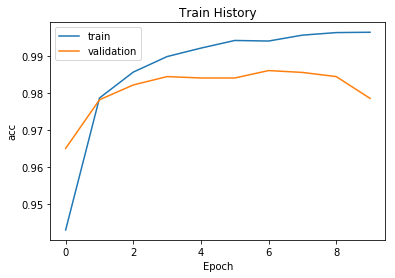

In [18]:
show_train_history(train_history,'acc','val_acc')

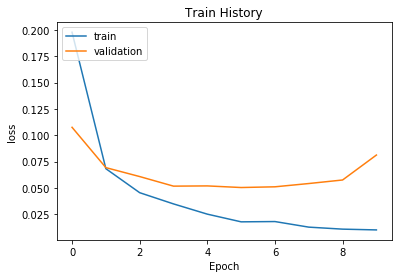

In [19]:
show_train_history(train_history,'loss','val_loss')

In [20]:
for layer in model.layers:
    g=layer.get_config()
    h=layer.get_weights()
    print (g)
    print (h)

{'name': 'conv2d_1', 'trainable': True, 'batch_input_shape': (None, 32, 32, 1), 'dtype': 'float32', 'filters': 6, 'kernel_size': (5, 5), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'activation': 'tanh', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
[array([[[[ 0.11868471,  0.02150517, -0.07504035, -0.02449849,
          -0.10154333, -0.05051146]],

        [[-0.01325043,  0.01785598,  0.06203361, -0.01643575,
          -0.13046892, -0.03133102]],

        [[ 0.02187043,  0.0838879 ,  0.0788324 , -0.17864512,
          -0.12234741, -0.10011908]],

        [[-0.22019976,  0.14892302, -0.16354378, -0.02015439,
          -0.12249578, 

In [21]:
import numpy as np
def show_images_labels_predict(images,labels,prediction_result):
    fig = plt.gcf()
    fig.set_size_inches(8, 10)
    for i in range(0, 25):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(np.reshape(images[i],(32, 32)), 
                  cmap='binary')
        ax.set_title("label=" +str(np.argmax(labels[i]))+
                     ",predict="+str(prediction_result[i])
                     ,fontsize=9) 
    plt.show()

In [22]:
prediction=model.predict_classes(X_val)

2000/2000 [==============================] - 0s 139us/step


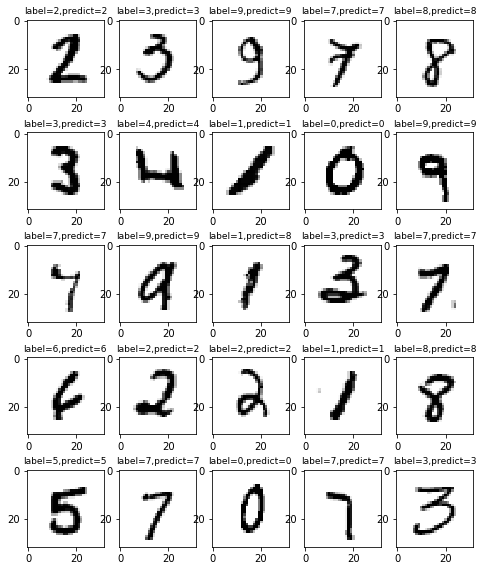

In [23]:
show_images_labels_predict(X_val,Y_val,prediction)

In [24]:
for i in range(0,500):
    if prediction[i]!=np.argmax(Y_val[i]):
        print("i="+str(i)+
              "   label=",np.argmax(Y_val[i]),
              "predict=",prediction[i])

i=12   label= 1 predict= 8
i=62   label= 1 predict= 8
i=96   label= 5 predict= 3
i=114   label= 3 predict= 8
i=121   label= 1 predict= 9
i=176   label= 5 predict= 3
i=178   label= 5 predict= 8
i=181   label= 3 predict= 5
i=228   label= 1 predict= 8
i=242   label= 1 predict= 9
i=262   label= 1 predict= 8
i=289   label= 5 predict= 8
i=328   label= 7 predict= 3
i=365   label= 1 predict= 8
i=396   label= 2 predict= 9
i=400   label= 5 predict= 8
i=425   label= 1 predict= 0
i=431   label= 2 predict= 8
i=481   label= 1 predict= 8


In [25]:
val_label=data_Val[:,0]

In [26]:
import pandas as pd
pd.crosstab(val_label,prediction,
            rownames=['label'],colnames=['predicat'])

predicat,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,196,0,0,0,0,0,1,0,0,0
1,1,211,0,0,0,0,0,0,10,3
2,2,0,181,1,1,0,0,2,2,1
3,0,0,1,194,0,1,0,0,1,1
4,0,1,0,0,222,0,0,0,0,3
5,0,0,0,6,0,145,0,0,9,2
6,1,0,0,0,0,0,214,0,1,0
7,0,0,4,3,0,0,0,192,2,1
8,0,1,0,0,1,0,0,0,176,1
